In [1]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the dataset into a DataFrame
# Replace 'ratings.csv' with the correct filename if needed
df = pd.read_csv('ratings.csv')

# Step 3: Display the first few rows of the dataset
print(df.head())


Saving ratings.csv to ratings (1).csv
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


Total number of unique users (Tnu): 610
Total number of unique items (Tni): 9724
Number of ratings per item: movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64


<ipython-input-6-525ece72382c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


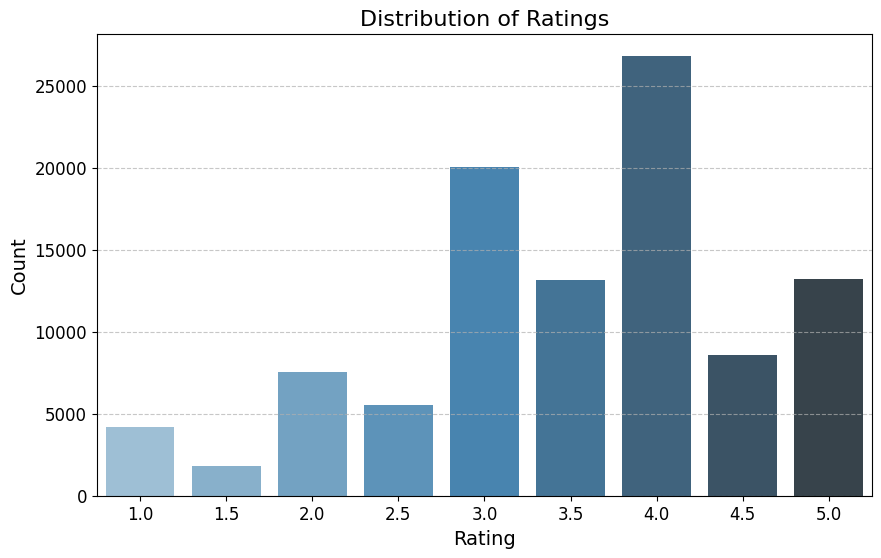

Sparsity of the dataset: 98.30%
The two target items selected are: I1=356, I2=318
Average rating for I1 (356): 4.165653495440729
Average rating for I2 (318): 4.429022082018927
Ratings for I1 after mean-filling:
userId
1      4.000000
2      4.165653
3      4.165653
4      4.165653
5      4.165653
         ...   
606    4.000000
607    4.165653
608    3.000000
609    4.000000
610    3.000000
Name: 356, Length: 610, dtype: float64
Ratings for I2 after mean-filling:
userId
1      4.429022
2      3.000000
3      4.429022
4      4.429022
5      3.000000
         ...   
606    3.500000
607    5.000000
608    4.500000
609    4.000000
610    3.000000
Name: 318, Length: 610, dtype: float64
Average rating for each item:
 movieId
1         3.923256
2         3.436364
3         3.269231
4         2.357143
5         3.081633
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Length: 9724, dtype: float64
Differences between ratings and m

<ipython-input-6-525ece72382c>:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_matrix[I1].fillna(I1_mean_rating, inplace=True)
<ipython-input-6-525ece72382c>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('ratings.csv')

# Step 2: Adjust the rating on a 1-to-5 scale
df['rating'] = df['rating'].apply(lambda x: max(1, min(5, x)))  # Ensure ratings are within [1, 5]

# Step 3: Count total number of users and items
Tnu = df['userId'].nunique()
Tni = df['movieId'].nunique()
print(f"Total number of unique users (Tnu): {Tnu}")
print(f"Total number of unique items (Tni): {Tni}")

# Step 4: Count the number of ratings for every product
ratings_per_item = df.groupby('movieId')['rating'].count()
print("Number of ratings per item:", ratings_per_item)

# Step 5: Draw the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df['rating'].value_counts(sort=False).index,
    y=df['rating'].value_counts(sort=False).values,
    palette='Blues_d'
)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check sparsity
total_possible_ratings = Tnu * Tni
actual_ratings = len(df)
sparsity = 1 - (actual_ratings / total_possible_ratings)
print(f"Sparsity of the dataset: {sparsity:.2%}")

# Step 6: Choose two target items (I1 and I2) with sufficient ratings
# Select two items with the highest number of ratings
sufficient_ratings = ratings_per_item.sort_values(ascending=False)
I1, I2 = sufficient_ratings.index[:2]
print(f"The two target items selected are: I1={I1}, I2={I2}")

# Step 7: Calculate the average rating for the target items (I1 and I2)
I1_mean_rating = df[df['movieId'] == I1]['rating'].mean()
I2_mean_rating = df[df['movieId'] == I2]['rating'].mean()
print(f"Average rating for I1 ({I1}): {I1_mean_rating}")
print(f"Average rating for I2 ({I2}): {I2_mean_rating}")

# Step 8: Use mean-filling to replace unspecified ratings for I1 and I2
# Create a pivot table (users as rows, movies as columns)
rating_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')

# Fill missing values for I1 and I2 with their respective mean ratings
rating_matrix[I1].fillna(I1_mean_rating, inplace=True)
rating_matrix[I2].fillna(I2_mean_rating, inplace=True)

print(f"Ratings for I1 after mean-filling:\n{rating_matrix[I1]}")
print(f"Ratings for I2 after mean-filling:\n{rating_matrix[I2]}")

# Step 9: Calculate the average rating for each item in the dataset
item_mean_ratings = rating_matrix.mean(axis=0)
print("Average rating for each item:\n", item_mean_ratings)

# Step 10: Calculate the difference between ratings and the mean rating for each item
rating_differences = rating_matrix.subtract(item_mean_ratings, axis=1)
print(f"Differences between ratings and mean for I1:\n{rating_differences[I1]}")
print(f"Differences between ratings and mean for I2:\n{rating_differences[I2]}")

# Step 11: Compute the covariance for I1 and I2
I1_I2_covariance = np.cov(rating_matrix[I1], rating_matrix[I2])[0, 1]
print(f"Covariance between I1 and I2: {I1_I2_covariance}")

# Save all results to a JSON file
results = {
    'Tnu': Tnu,
    'Tni': Tni,
    'sparsity': sparsity,
    'ratings_per_item': ratings_per_item.to_dict(),
    'target_items': {'I1': I1, 'I2': I2},
    'mean_ratings': {'I1': I1_mean_rating, 'I2': I2_mean_rating},
    'covariance': I1_I2_covariance
}




In [7]:
# Step to Generate the Covariance Matrix
covariance_matrix = rating_matrix.cov()
print("Covariance matrix:\n", covariance_matrix)


Covariance matrix:
 movieId    1         2         3        4         5         6         7       \
movieId                                                                        
1        0.682167  0.216144  0.335433  0.62500  0.201613  0.065638  0.182712   
2        0.216144  0.752794  0.450769  0.00000  0.445346  0.119841  0.262255   
3        0.335433  0.450769  1.063348      NaN  0.526316  0.356250  0.494883   
4        0.625000  0.000000       NaN  0.72619  0.750000  0.000000  0.075000   
5        0.201613  0.445346  0.526316  0.75000  0.774447  0.161685  0.423419   
...           ...       ...       ...      ...       ...       ...       ...   
193581        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193583        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193585        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193587        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193609        NaN   

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 3.2.7: Determine the top 5-peers and top 10-peers for I1 and I2
def get_top_peers(item_id, covariance_matrix, top_n):
    item_covariance = covariance_matrix[item_id].drop(item_id)  # Exclude self
    top_peers = item_covariance.sort_values(ascending=False).head(top_n).index.tolist()
    return top_peers

top_5_peers_I1 = get_top_peers(I1, covariance_matrix, 5)
top_10_peers_I1 = get_top_peers(I1, covariance_matrix, 10)

top_5_peers_I2 = get_top_peers(I2, covariance_matrix, 5)
top_10_peers_I2 = get_top_peers(I2, covariance_matrix, 10)

print(f"Top 5 peers for I1 ({I1}): {top_5_peers_I1}")
print(f"Top 10 peers for I1 ({I1}): {top_10_peers_I1}")
print(f"Top 5 peers for I2 ({I2}): {top_5_peers_I2}")
print(f"Top 10 peers for I2 ({I2}): {top_10_peers_I2}")

# Step 3.2.8: Determine reduced dimensional space for each user using top 5-peers
def reduced_space(rating_matrix, peers):
    return rating_matrix[peers].mean(axis=1)

reduced_space_top5_I1 = reduced_space(rating_matrix, top_5_peers_I1)
reduced_space_top5_I2 = reduced_space(rating_matrix, top_5_peers_I2)

print(f"Reduced dimensional space for I1 using top 5-peers:\n{reduced_space_top5_I1}")
print(f"Reduced dimensional space for I2 using top 5-peers:\n{reduced_space_top5_I2}")

# Step 3.2.9: Predict missing ratings for I1 and I2 using top 5-peers
def predict_rating(original_matrix, item_id, reduced_space):
    predicted_ratings = original_matrix[item_id].copy()
    predicted_ratings[original_matrix[item_id].isna()] = reduced_space[original_matrix[item_id].isna()]
    return predicted_ratings

predicted_ratings_I1_top5 = predict_rating(rating_matrix, I1, reduced_space_top5_I1)
predicted_ratings_I2_top5 = predict_rating(rating_matrix, I2, reduced_space_top5_I2)

print(f"Predicted ratings for I1 using top 5-peers:\n{predicted_ratings_I1_top5}")
print(f"Predicted ratings for I2 using top 5-peers:\n{predicted_ratings_I2_top5}")

# Step 3.2.10: Determine reduced dimensional space for each user using top 10-peers
reduced_space_top10_I1 = reduced_space(rating_matrix, top_10_peers_I1)
reduced_space_top10_I2 = reduced_space(rating_matrix, top_10_peers_I2)

print(f"Reduced dimensional space for I1 using top 10-peers:\n{reduced_space_top10_I1}")
print(f"Reduced dimensional space for I2 using top 10-peers:\n{reduced_space_top10_I2}")

# Step 3.2.11: Predict missing ratings for I1 and I2 using top 10-peers
predicted_ratings_I1_top10 = predict_rating(rating_matrix, I1, reduced_space_top10_I1)
predicted_ratings_I2_top10 = predict_rating(rating_matrix, I2, reduced_space_top10_I2)

print(f"Predicted ratings for I1 using top 10-peers:\n{predicted_ratings_I1_top10}")
print(f"Predicted ratings for I2 using top 10-peers:\n{predicted_ratings_I2_top10}")

# Step 3.2.12: Compare results from top 5-peers and top 10-peers
def compare_predictions(predicted_top5, predicted_top10):
    comparison = pd.DataFrame({
        'Top 5 Prediction': predicted_top5,
        'Top 10 Prediction': predicted_top10
    })
    return comparison

comparison_I1 = compare_predictions(predicted_ratings_I1_top5, predicted_ratings_I1_top10)
comparison_I2 = compare_predictions(predicted_ratings_I2_top5, predicted_ratings_I2_top10)

print(f"Comparison of predictions for I1:\n{comparison_I1}")
print(f"Comparison of predictions for I2:\n{comparison_I2}")


Top 5 peers for I1 (356): [484, 1718, 984, 141830, 946]
Top 10 peers for I1 (356): [484, 1718, 984, 141830, 946, 49389, 91470, 71429, 3097, 6650]
Top 5 peers for I2 (318): [42018, 105585, 100810, 26249, 132422]
Top 10 peers for I2 (318): [42018, 105585, 100810, 26249, 132422, 71033, 2782, 91622, 4617, 4316]
Reduced dimensional space for I1 using top 5-peers:
userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
Length: 610, dtype: float64
Reduced dimensional space for I2 using top 5-peers:
userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    2.5
607    NaN
608    NaN
609    NaN
610    2.0
Length: 610, dtype: float64
Predicted ratings for I1 using top 5-peers:
userId
1      4.000000
2      4.165653
3      4.165653
4      4.165653
5      4.165653
         ...   
606    4.000000
607    4.165653
608    3.000000
609    4.000000
610    3.000000
Name: 356, Length: 610, dtype: float64
Predicted ratings fo

In [11]:
def optimized_mle_covariance_matrix(rating_matrix):
    # Optimized covariance matrix calculation
    return rating_matrix.cov()

# Step 3.3.1: Generate the covariance matrix using optimized MLE
mle_cov_matrix = optimized_mle_covariance_matrix(rating_matrix)
print("Optimized MLE-based covariance matrix:\n", mle_cov_matrix)

Optimized MLE-based covariance matrix:
 movieId    1         2         3        4         5         6         7       \
movieId                                                                        
1        0.682167  0.216144  0.335433  0.62500  0.201613  0.065638  0.182712   
2        0.216144  0.752794  0.450769  0.00000  0.445346  0.119841  0.262255   
3        0.335433  0.450769  1.063348      NaN  0.526316  0.356250  0.494883   
4        0.625000  0.000000       NaN  0.72619  0.750000  0.000000  0.075000   
5        0.201613  0.445346  0.526316  0.75000  0.774447  0.161685  0.423419   
...           ...       ...       ...      ...       ...       ...       ...   
193581        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193583        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193585        NaN       NaN       NaN      NaN       NaN       NaN       NaN   
193587        NaN       NaN       NaN      NaN       NaN       NaN       NaN   


In [12]:
# Step 3.3.2: Determine the top 5-peers and top 10-peers for each target item (I1 and I2)
top_5_peers_I1_mle = get_top_peers(I1, mle_cov_matrix, 5)
top_10_peers_I1_mle = get_top_peers(I1, mle_cov_matrix, 10)

top_5_peers_I2_mle = get_top_peers(I2, mle_cov_matrix, 5)
top_10_peers_I2_mle = get_top_peers(I2, mle_cov_matrix, 10)

print(f"Top 5 peers for I1 ({I1}) using MLE: {top_5_peers_I1_mle}")
print(f"Top 10 peers for I1 ({I1}) using MLE: {top_10_peers_I1_mle}")
print(f"Top 5 peers for I2 ({I2}) using MLE: {top_5_peers_I2_mle}")
print(f"Top 10 peers for I2 ({I2}) using MLE: {top_10_peers_I2_mle}")

# Step 3.3.3: Determine reduced dimensional space for each user using top 5-peers
reduced_space_top5_I1_mle = reduced_space(rating_matrix, top_5_peers_I1_mle)
reduced_space_top5_I2_mle = reduced_space(rating_matrix, top_5_peers_I2_mle)

print(f"Reduced dimensional space for I1 using top 5-peers (MLE):\n{reduced_space_top5_I1_mle}")
print(f"Reduced dimensional space for I2 using top 5-peers (MLE):\n{reduced_space_top5_I2_mle}")

# Step 3.3.4: Predict missing ratings for I1 and I2 using top 5-peers
predicted_ratings_I1_top5_mle = predict_rating(rating_matrix, I1, reduced_space_top5_I1_mle)
predicted_ratings_I2_top5_mle = predict_rating(rating_matrix, I2, reduced_space_top5_I2_mle)

print(f"Predicted ratings for I1 using top 5-peers (MLE):\n{predicted_ratings_I1_top5_mle}")
print(f"Predicted ratings for I2 using top 5-peers (MLE):\n{predicted_ratings_I2_top5_mle}")

# Step 3.3.5: Determine reduced dimensional space for each user using top 10-peers
reduced_space_top10_I1_mle = reduced_space(rating_matrix, top_10_peers_I1_mle)
reduced_space_top10_I2_mle = reduced_space(rating_matrix, top_10_peers_I2_mle)

print(f"Reduced dimensional space for I1 using top 10-peers (MLE):\n{reduced_space_top10_I1_mle}")
print(f"Reduced dimensional space for I2 using top 10-peers (MLE):\n{reduced_space_top10_I2_mle}")

# Step 3.3.6: Predict missing ratings for I1 and I2 using top 10-peers
predicted_ratings_I1_top10_mle = predict_rating(rating_matrix, I1, reduced_space_top10_I1_mle)
predicted_ratings_I2_top10_mle = predict_rating(rating_matrix, I2, reduced_space_top10_I2_mle)

print(f"Predicted ratings for I1 using top 10-peers (MLE):\n{predicted_ratings_I1_top10_mle}")
print(f"Predicted ratings for I2 using top 10-peers (MLE):\n{predicted_ratings_I2_top10_mle}")

# Step 3.3.7: Compare results of 3.3.3 with 3.3.6
comparison_I1_top5_top10 = pd.DataFrame({
    'Top 5 Prediction': predicted_ratings_I1_top5_mle,
    'Top 10 Prediction': predicted_ratings_I1_top10_mle
})
comparison_I2_top5_top10 = pd.DataFrame({
    'Top 5 Prediction': predicted_ratings_I2_top5_mle,
    'Top 10 Prediction': predicted_ratings_I2_top10_mle
})

print(f"Comparison of predictions for I1 (Top 5 vs Top 10):\n{comparison_I1_top5_top10}")
print(f"Comparison of predictions for I2 (Top 5 vs Top 10):\n{comparison_I2_top5_top10}")

# Step 3.3.8: Compare results of 3.2.9 with 3.3.4
comparison_I1_prev_top5 = pd.DataFrame({
    'Previous Top 5 Prediction': predicted_ratings_I1_top5,
    'MLE Top 5 Prediction': predicted_ratings_I1_top5_mle
})
comparison_I2_prev_top5 = pd.DataFrame({
    'Previous Top 5 Prediction': predicted_ratings_I2_top5,
    'MLE Top 5 Prediction': predicted_ratings_I2_top5_mle
})

print(f"Comparison of predictions for I1 (Previous vs MLE, Top 5):\n{comparison_I1_prev_top5}")
print(f"Comparison of predictions for I2 (Previous vs MLE, Top 5):\n{comparison_I2_prev_top5}")

# Step 3.3.9: Compare results of 3.2.11 with 3.3.6
comparison_I1_prev_top10 = pd.DataFrame({
    'Previous Top 10 Prediction': predicted_ratings_I1_top10,
    'MLE Top 10 Prediction': predicted_ratings_I1_top10_mle
})
comparison_I2_prev_top10 = pd.DataFrame({
    'Previous Top 10 Prediction': predicted_ratings_I2_top10,
    'MLE Top 10 Prediction': predicted_ratings_I2_top10_mle
})

print(f"Comparison of predictions for I1 (Previous vs MLE, Top 10):\n{comparison_I1_prev_top10}")
print(f"Comparison of predictions for I2 (Previous vs MLE, Top 10):\n{comparison_I2_prev_top10}")


Top 5 peers for I1 (356) using MLE: [484, 1718, 984, 141830, 946]
Top 10 peers for I1 (356) using MLE: [484, 1718, 984, 141830, 946, 49389, 91470, 71429, 3097, 6650]
Top 5 peers for I2 (318) using MLE: [42018, 105585, 100810, 26249, 132422]
Top 10 peers for I2 (318) using MLE: [42018, 105585, 100810, 26249, 132422, 71033, 2782, 91622, 4617, 4316]
Reduced dimensional space for I1 using top 5-peers (MLE):
userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
Length: 610, dtype: float64
Reduced dimensional space for I2 using top 5-peers (MLE):
userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    2.5
607    NaN
608    NaN
609    NaN
610    2.0
Length: 610, dtype: float64
Predicted ratings for I1 using top 5-peers (MLE):
userId
1      4.000000
2      4.165653
3      4.165653
4      4.165653
5      4.165653
         ...   
606    4.000000
607    4.165653
608    3.000000
609    4.000000
610    3.000000
N

In [13]:
import numpy as np
from scipy.linalg import svd
from sklearn.preprocessing import normalize

# Step 3.4.1: Calculate the average rating for each item
item_mean_ratings = rating_matrix.mean(axis=0)
print("Average rating for each item:\n", item_mean_ratings)

# Step 3.4.2: Use mean-filling method to replace unspecified ratings
mean_filled_matrix = rating_matrix.fillna(item_mean_ratings)
print("Mean-filled ratings matrix:\n", mean_filled_matrix)

# Step 3.4.3: Compute eigenvalues and eigenvectors using SVD
# Perform SVD on the mean-filled ratings matrix
U, Sigma, Vt = svd(mean_filled_matrix, full_matrices=False)

print("Left singular vectors (U):\n", U)
print("Singular values (Σ):\n", Sigma)
print("Right singular vectors (V^T):\n", Vt)

# Step 3.4.4: Check mutual orthogonality of eigenvectors (columns of U and rows of Vt)
# Dot product of every pair of columns in U and rows in Vt should be close to zero
orthogonality_U = np.allclose(U.T @ U, np.eye(U.shape[1]), atol=1e-6)
orthogonality_Vt = np.allclose(Vt @ Vt.T, np.eye(Vt.shape[0]), atol=1e-6)

print(f"Are columns of U mutually orthogonal? {orthogonality_U}")
print(f"Are rows of V^T mutually orthogonal? {orthogonality_Vt}")

if not orthogonality_U or not orthogonality_Vt:
    print("Vectors are not mutually orthogonal. Proceeding to Step 3.4.5.")

# Step 3.4.5: Perform vector normalization to make vectors orthogonal and linearly independent
# Normalize the columns of U and rows of Vt
U_normalized = normalize(U, axis=0)
Vt_normalized = normalize(Vt, axis=1)

print("Normalized left singular vectors (U):\n", U_normalized)
print("Normalized right singular vectors (V^T):\n", Vt_normalized)

# Reduced representation (low-rank approximation)
k = 10  # Number of factors/features to retain
U_k = U_normalized[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt_normalized[:k, :]

# Approximate the original matrix
low_rank_matrix = np.dot(np.dot(U_k, Sigma_k), Vt_k)
print("Low-rank approximation of the original matrix:\n", low_rank_matrix)


Average rating for each item:
 movieId
1         3.923256
2         3.436364
3         3.269231
4         2.357143
5         3.081633
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Length: 9724, dtype: float64
Mean-filled ratings matrix:
 movieId    1         2         3         4         5         6         7       \
userId                                                                          
1        4.000000  3.436364  4.000000  2.357143  3.081633  4.000000  3.185185   
2        3.923256  3.436364  3.269231  2.357143  3.081633  3.946078  3.185185   
3        3.923256  3.436364  3.269231  2.357143  3.081633  3.946078  3.185185   
4        3.923256  3.436364  3.269231  2.357143  3.081633  3.946078  3.185185   
5        4.000000  3.436364  3.269231  2.357143  3.081633  3.946078  3.185185   
...           ...       ...       ...       ...       ...       ...       ...   
606      2.500000  3.436364  3.269231  2.35714

In [14]:
import numpy as np

# Step 3.4.6: Check if the eigenvectors are orthonormal
def check_orthonormality(vectors):
    identity = np.eye(vectors.shape[1])  # Identity matrix
    product = np.dot(vectors.T, vectors)  # Dot product of transpose and original matrix
    return np.allclose(product, identity, atol=1e-6)  # Check if close to identity matrix

is_orthonormal = check_orthonormality(U)
print(f"Are the eigenvectors orthonormal? {is_orthonormal}")

if is_orthonormal:
    print("Eigenvectors are orthonormal. Proceeding with original eigenvalues.")
else:
    print("Eigenvectors are not orthonormal. Applying Gram-Schmidt process.")

# Step 3.4.7: Apply Gram-Schmidt method to orthogonalize and normalize vectors
def gram_schmidt(vectors):
    orthonormal_set = []
    for i, v in enumerate(vectors.T):  # Process column vectors
        # Step 3.4.7.5: Subtract projections on previous orthonormal vectors
        for u in orthonormal_set:
            v -= np.dot(v, u) * u

        # Step 3.4.7.2: Normalize the vector
        v_norm = np.linalg.norm(v)
        if v_norm > 0:
            v /= v_norm

        orthonormal_set.append(v)

    return np.array(orthonormal_set).T  # Return as columns

# Apply Gram-Schmidt to eigenvectors
orthonormal_U = gram_schmidt(U)

# Verify orthonormality after Gram-Schmidt
is_orthonormal_after = check_orthonormality(orthonormal_U)
print(f"Are the vectors orthonormal after Gram-Schmidt? {is_orthonormal_after}")

# Step 3.4.7.3 - 3.4.7.9: Recalculate eigenvalues and normalize
new_eigenvalues = np.diag(Sigma)[:len(orthonormal_U)]
print("Recalculated eigenvalues:\n", new_eigenvalues)

# Verify the new set and normalization
print("Orthonormalized eigenvectors:\n", orthonormal_U)


Are the eigenvectors orthonormal? True
Eigenvectors are orthonormal. Proceeding with original eigenvalues.
Are the vectors orthonormal after Gram-Schmidt? True
Recalculated eigenvalues:
 [[8.23635454e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00920812e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.88775978e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.87511809e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.07548066e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.85495323e-01]]
Orthonormalized eigenvectors:
 [[-4.07267180e-02  6.67858857e-02 -1.69895451e-02 ...  9.37834129e-04
  -3.89595711e-04  2.02848956e-03]
 [-4.04883841e-02 -1.62882053e-03  3.68614855e-03 ... -1.52424611e-03
  -1.81

In [15]:
def full_gram_schmidt(vectors):
    """
    Full Gram-Schmidt process to orthonormalize all vectors and compute corresponding eigenvalues.
    """
    n_vectors = vectors.shape[1]
    orthonormal_set = []
    eigenvalues = []

    for i in range(n_vectors):
        v = vectors[:, i]  # Current vector
        # Step 3.4.7.5: Subtract projection onto all previous orthonormal vectors
        for u in orthonormal_set:
            v -= np.dot(v, u) * u

        # Step 3.4.7.2 and 3.4.7.7: Normalize the resulting vector
        v_norm = np.linalg.norm(v)
        if v_norm > 0:
            e = v / v_norm  # Normalized orthonormal vector
            orthonormal_set.append(e)
            eigenvalue = np.dot(vectors[:, i].T, v) / v_norm  # New eigenvalue
            eigenvalues.append(eigenvalue)
        else:
            eigenvalues.append(0)  # Handle degenerate case

    return np.array(orthonormal_set).T, np.array(eigenvalues)

# Apply the full Gram-Schmidt process to compute all orthonormal vectors and eigenvalues
orthonormal_vectors, new_eigenvalues = full_gram_schmidt(U)

# Output the results
print("New Orthonormal Vectors (Columns):\n", orthonormal_vectors)
print("New Eigenvalues:\n", new_eigenvalues)

# Reconstruct the original matrix using new orthonormal vectors and eigenvalues
low_rank_reconstructed_matrix = np.dot(orthonormal_vectors, np.diag(new_eigenvalues) @ Vt)
print("Reconstructed Matrix with Full Orthonormalization:\n", low_rank_reconstructed_matrix)


New Orthonormal Vectors (Columns):
 [[-4.07267180e-02  6.67858857e-02 -1.69895451e-02 ...  9.37834129e-04
  -3.89595711e-04  2.02848956e-03]
 [-4.04883841e-02 -1.62882053e-03  3.68614855e-03 ... -1.52424611e-03
  -1.81767936e-03  5.90153924e-03]
 [-4.04415649e-02 -1.15017711e-02  1.14913224e-02 ... -8.60052739e-04
  -5.40173307e-04  1.02327110e-03]
 ...
 [-4.03468348e-02 -5.43749002e-02 -6.24145821e-02 ...  1.11834027e-04
   8.45788540e-05  2.65717241e-03]
 [-4.04762547e-02 -9.49579533e-03 -3.36769638e-04 ...  1.80679050e-02
   8.78248652e-03  1.33641212e-02]
 [-4.08650835e-02  1.20935022e-01 -8.10728245e-02 ...  1.99346616e-04
  -1.55130128e-03  2.37170900e-03]]
New Eigenvalues:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.

In [17]:
# Step 3.4.8: Construct the predicted weighting matrix Σ (diagonal matrix of eigenvalues)
Sigma_predicted = np.diag(new_eigenvalues)
print("Predicted weighting matrix Σ:\n", Sigma_predicted)

# Step 3.4.9: Construct the items matrix V^T, its columns are orthonormal vectors (e3, e4, ..., en)
V_predicted = Vt[:len(new_eigenvalues), :]
print("Predicted items matrix V^T:\n", V_predicted)

# Step 3.4.10: Construct the predicted user matrix Ũ, its columns are the predicted vectors (u1, u2, ..., un)
U_predicted = orthonormal_vectors
print("Predicted user matrix Ũ:\n", U_predicted)

# Step 3.4.11: Construct the newly reduced rating matrix R̂ = ŨΣV̂^T
reduced_rating_matrix = np.dot(np.dot(U_predicted, Sigma_predicted), V_predicted)
print("Newly reduced rating matrix R̂:\n", reduced_rating_matrix)

# Step 3.4.12: Find missing ratings for target items I1 and I2
def predict_missing_ratings(original_matrix, reduced_matrix, target_items, user_mapping, item_mapping):
    """
    Predict missing ratings for target items in the original matrix using the reduced matrix.
    original_matrix: DataFrame - Original user-item rating matrix
    reduced_matrix: ndarray - Reconstructed reduced rating matrix
    target_items: list - List of target items for which to predict ratings
    user_mapping: list - List of user indices corresponding to rows in reduced_matrix
    item_mapping: list - List of item indices corresponding to columns in reduced_matrix
    """
    predictions = {}
    for item in target_items:
        # Find the corresponding column in the reduced matrix
        if item in item_mapping:
            reduced_item_idx = item_mapping.index(item)
            missing_users = original_matrix[item].isna()

            # Map user indices to reduced matrix
            user_indices = [user_mapping.index(user) for user in missing_users.index if user in user_mapping]

            # Extract predicted ratings
            predictions[item] = {missing_users.index[i]: reduced_matrix[user_indices[i], reduced_item_idx]
                                 for i in range(len(user_indices))}
        else:
            predictions[item] = {}
    return predictions

# Map user and item indices
user_mapping = list(rating_matrix.index)
item_mapping = list(rating_matrix.columns)

# Predict missing ratings for I1 and I2
predicted_missing_ratings = predict_missing_ratings(rating_matrix, reduced_rating_matrix, target_items, user_mapping, item_mapping)

print(f"Predicted missing ratings for I1 ({I1}):\n", predicted_missing_ratings[I1])
print(f"Predicted missing ratings for I2 ({I2}):\n", predicted_missing_ratings[I2])



Predicted weighting matrix Σ:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Predicted items matrix V^T:
 [[-1.17657902e-02 -1.03058706e-02 -9.80424019e-03 ... -1.04953259e-02
  -1.04953259e-02 -1.19946582e-02]
 [ 7.52616222e-02  6.85248024e-02  4.19386405e-02 ... -4.79464467e-03
  -4.79464467e-03 -5.47959391e-03]
 [-8.69969211e-04  3.04238386e-02  2.39605506e-02 ... -8.55005442e-04
  -8.55005442e-04 -9.77149077e-04]
 ...
 [ 7.15847454e-02 -5.20402332e-02  1.06196978e-03 ...  4.45547048e-05
   4.45547048e-05  5.09196627e-05]
 [ 4.82899877e-02  5.36061854e-02  3.69656215e-03 ...  6.78870161e-05
   6.78870161e-05  7.75851613e-05]
 [ 4.97174587e-02 -3.44919949e-02  2.49731297e-02 ... -6.64836223e-05
  -6.64836223e-05 -7.59812826e-05]]
Predicted user matrix Ũ:
 [[-4.07267180e-02  6.67858857e-02 -1.69895451e-02 ...  9.37834129e-04
  -3.89595711e-04  2.02848956e-03]
 [-4.04883841e-02